Text(0.5, 1.0, 'Hurricane Florence predictions and wind direction truths')

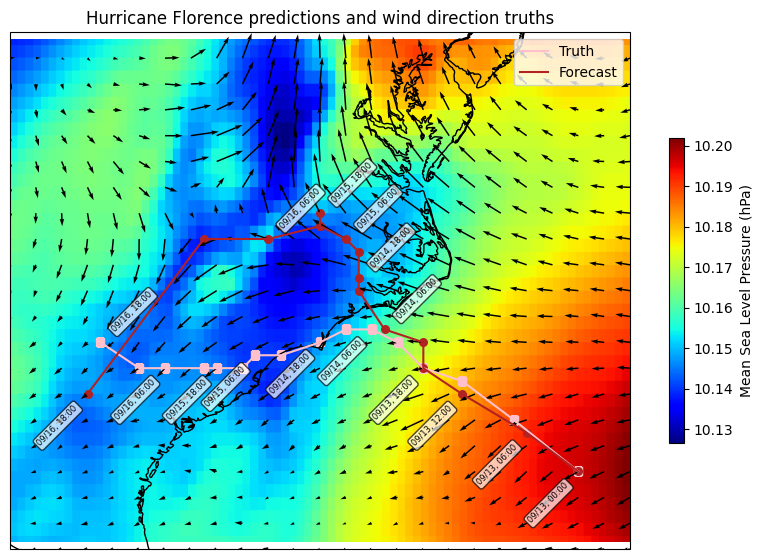

In [3]:
import os
from datetime import datetime, timedelta
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


msl_heatmap = np.load('msl_hPA.npy')
track_true_x = np.load('florence_true_x.npy')
track_true_y = np.load('florence_true_y.npy')
track_pred_x = np.load('florence_pred_x.npy')
track_pred_y = np.load('florence_pred_y.npy')
u10_heatmap = np.load('u10.npy')
v10_heatmap = np.load('v10.npy')


central_longitude = 180
projection = ccrs.PlateCarree(central_longitude=central_longitude)
dttme = datetime(2023, 9, 13, 0, 0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 12), subplot_kw={'projection': projection})

# nc_extent = [-90, -70, 25, 45]  # [lon_min, lon_max, lat_min, lat_max]
nc_extent = [-84, -72, 30, 40]
ax.set_extent(nc_extent, crs=ccrs.PlateCarree())
ax.coastlines()
img = ax.imshow(msl_heatmap/100, cmap='jet', extent=nc_extent, transform=ccrs.PlateCarree())
fig.colorbar(img, ax=ax, orientation='vertical', label="Mean Sea Level Pressure (hPa)", shrink=.33)

plt.scatter(np.array(track_true_x), np.array(track_true_y), s=30, marker='s', c='pink', transform=ccrs.PlateCarree())
plt.plot(np.array(track_true_x), np.array(track_true_y), c='pink', label="Truth", transform=ccrs.PlateCarree())
plt.scatter(np.array(track_pred_x), np.array(track_pred_y), s=30, marker='o', c='firebrick', transform=ccrs.PlateCarree())
plt.plot(np.array(track_pred_x), np.array(track_pred_y), c='firebrick', label="Forecast", transform=ccrs.PlateCarree())
plt.legend()

for x1, y1, x2, y2, i in zip(track_true_x, track_true_y, track_pred_x, track_pred_y, range(0, 100)):
    timestamp = dttme + timedelta(hours=6 * i)
    time_label = timestamp.strftime('%m/%d, %H:00')  # Only display day and hour
    text_props = dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.7)

    if i < 4:
        ax.text(x2 - 1, y2 - 1, time_label, transform=ccrs.PlateCarree(),
                fontsize=6, color='black', rotation=45, bbox=text_props)
    elif y1 > y2 and i % 2 == 1:
        ax.text(x1 + .2, y1 + .2, time_label, transform=ccrs.PlateCarree(),
                fontsize=6, color='black', rotation=45, bbox=text_props)
        ax.text(x2 - 1, y2 - 1, time_label, transform=ccrs.PlateCarree(),
                fontsize=6, color='black', rotation=45, bbox=text_props)
    elif i % 2 == 1:
        ax.text(x1 - 1, y1 - 1, time_label, transform=ccrs.PlateCarree(),
                fontsize=6, color='black', rotation=45, bbox=text_props)
        ax.text(x2 + .2, y2 + .2, time_label, transform=ccrs.PlateCarree(),
                fontsize=6, color='black', rotation=45, bbox=text_props)

X = np.arange(-90, -70, .5)
Y = np.arange(30, 40, .5)
U = u10_heatmap[::2, ::2]
V = v10_heatmap[::2, ::2]

q = plt.quiver(X, Y, U, V, transform=ccrs.PlateCarree())

ax.set_title('Hurricane Florence predictions and wind direction truths')

